# Code to reproduce Figure 1 of Lavergne et al. (2019)

In [1]:
from datetime import datetime, timedelta
import time
import matplotlib
from matplotlib import pylab as plt
from PIL import Image

import matplotlib.transforms as mtransforms
from matplotlib.patches import FancyBboxPatch

matplotlib.rc('xtick', labelsize=22) 

In [2]:
def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = datetime(year=year, month=1, day=1)
    startOfNextYear = datetime(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction




# Bbox object around which the fancy box will be drawn.
def draw_bbox(ax, bb, label=None,ready=True):
    # boxstyle=square with pad=0, i.e. bbox itself.
    bb = mtransforms.Bbox([[bb[0], bb[2]], [bb[1], bb[3]]])
    
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="square,pad=0.",
                            ec="k", fc="none", zorder=10.,)
    
    if ready:
        ec=(0.3,0.3,0.3)
        fc=(0.8,0.8,0.8)
        lw=2
        ls='-'
    else:
        ec=(0.3,0.3,0.3)
        fc=(0.9,0.9,0.9)
        lw=1
        ls=':'
    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                             ec=ec, fc=fc, lw=lw,ls=ls,
                             zorder=-1)

    if label:
        ax.text(bb.xmin+0.2,bb.ymin,label,fontsize=15,ha='left',va='bottom',style='italic')
    
    ax.add_patch(p_fancy)
    #ax.add_patch(p_bbox)

['AMSR3 (?)', 'AMSR2', 'AMSR-E', 'yspace-Japan', 'WCOM (?)', 'MWRI FY3D', 'MWRI FY3C', 'MWRI FY3B', 'MWRI FY3A', 'yspace-China', 'CIMR-NG', 'CIMR', 'MWI SG3', 'MWI SG2', 'MWI SG1', 'yspace-Europe', 'SSMIS F19', 'SSMIS F18', 'SSMIS F17', 'SSMIS F16', 'SSMI F15', 'SSMI F14', 'SSMI F13', 'SSMI F11', 'SSMI F10', 'SSMI8', 'SMMR', 'ESMR', 'yspace-USA']
f01.png is ready


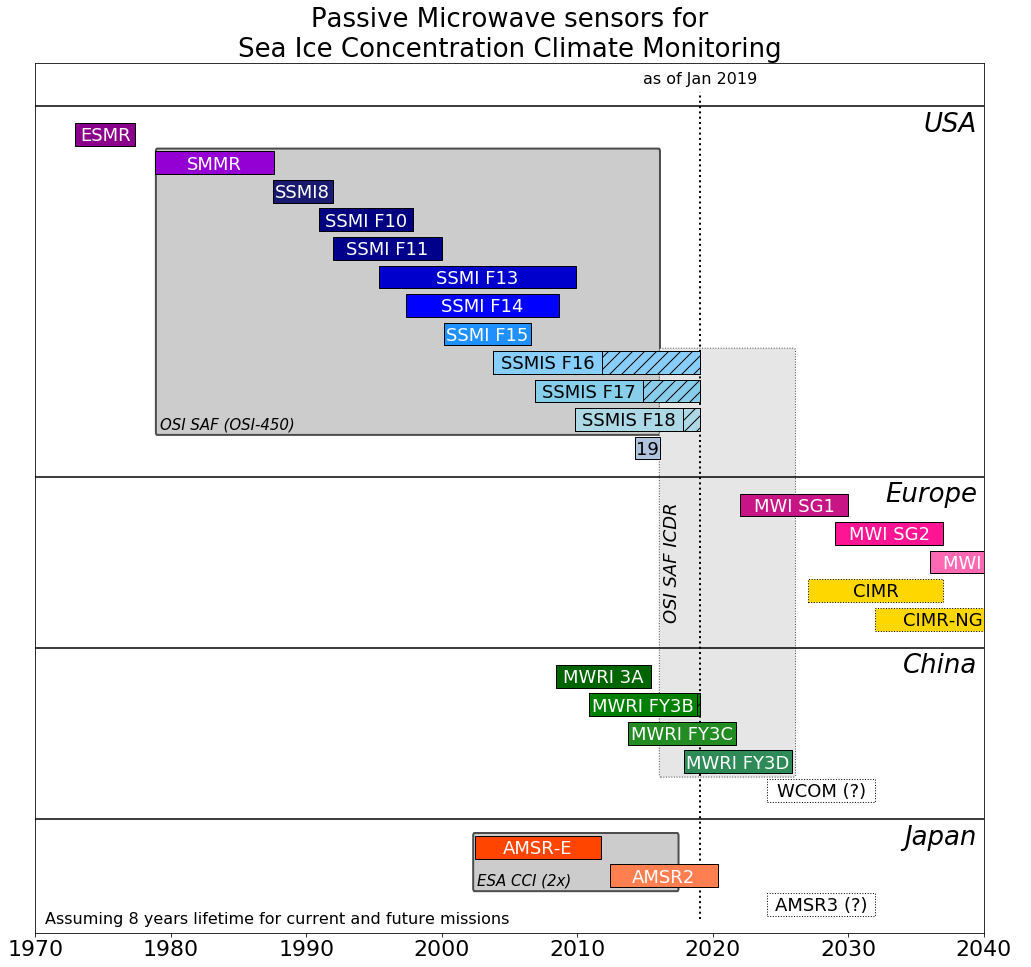

In [3]:
SIC_sats = []
#SIC_sats += ['Meteor N3',] + ['MetN%1d' % (d,) for d in range (2,0,-1)]
#SIC_sats += ['yspace-Russia']
SIC_sats += ['AMSR3 (?)','AMSR2','AMSR-E']
SIC_sats += ['yspace-Japan']
SIC_sats += ['WCOM (?)',]
SIC_sats += ['MWRI FY3%s' % (c.upper(),) for c in ('d','c','b','a')]
SIC_sats += ['yspace-China']
SIC_sats += ['CIMR-NG','CIMR']
SIC_sats += ['MWI SG%1d' % (d,) for d in range(3,0,-1)]
SIC_sats += ['yspace-Europe']
SIC_sats += ['SSMIS F%02d' % (d,) for d in range(19,15,-1)]
SIC_sats += ['SSMI F%d' % (d,) for d in (15,14,13,11,10)] + ['SSMI8']
SIC_sats += ['SMMR',]
SIC_sats += ['ESMR',]
SIC_sats += ['yspace-USA']

#SIC_sats += ['ERA-Interim']

print( SIC_sats )

sflying = datetime.today() + timedelta(days=25.*365.25)
mlength = 8

dates = dict()
dates['ERA-Interim'] = (datetime(1979,1,1), sflying)
dates['AMSR-E']      = (datetime(2002,6,1), datetime(2011,10,4))
dates['AMSR2']   = (datetime(2012,5,17),sflying)
dates['AMSR3 (?)']   = (datetime(2024,1,1),sflying)
dates['SSMIS F20']   = (datetime(2020,1,1),sflying)
dates['SSMIS F19']   = (datetime(2014,4,3),datetime(2016,2,11))
dates['SSMIS F18']   = (datetime(2009,10,18),sflying)
dates['SSMIS F17']   = (datetime(2006,11,4),sflying)
dates['SSMIS F16']   = (datetime(2003,10,18),sflying)
dates['SSMI F15']   = (datetime(2000,2,28),datetime(2006,7,31))
dates['SSMI F14']   = (datetime(1997,5,7),datetime(2008,8,23))
dates['SSMI F13']   = (datetime(1995,5,3),datetime(2009,11,15))
dates['SSMI F11']   = (datetime(1992,1,1),datetime(1999,12,31))
dates['SSMI F10']   = (datetime(1990,12,15),datetime(1997,11,15))
dates['SSMI8']     = (datetime(1987,7,9),datetime(1991,12,8))
dates['SMMR']        = (datetime(1978,10,25),datetime(1987,8,20))
dates['ESMR']      = (datetime(1972,12,11), datetime(1977,5,16))
dates['MWI SG1']     = (datetime(2022,1,1),sflying)
dates['MWI SG2']     = (datetime(2029,1,1),sflying)
dates['MWI SG3']     = (datetime(2036,1,1),sflying)
dates['MWRI FY3D']   = (datetime(2017,11,14),sflying)
dates['MWRI FY3C']   = (datetime(2013,9,23),sflying)
dates['MWRI FY3B']   = (datetime(2010,11,4),sflying)
dates['MWRI FY3A']   = (datetime(2008,5,27),datetime(2015,6,5))
dates['MetN1']   = (datetime(2009,9,17),datetime(2014,11,23))
dates['MetN2']   = (datetime(2014,7,8),datetime(2017,8,15))
dates['Meteor N3']   = (datetime(2017,12,10),datetime(2017,12,11))
dates['WCOM (?)']    = (datetime(2024,1,1), sflying)
dates['CIMR']    = (datetime(2027,1,1), sflying)
dates['CIMR-NG']    = (datetime(2032,1,1), sflying)

colors=dict()
colors['ERA-Interim'] = 'Yellow'
colors['ESMR'] = 'DarkMagenta'
colors['SMMR'] = 'DarkViolet'
colors['SSMI8'] = 'MidnightBlue'
colors['SSMI F10'] = 'Navy'
colors['SSMI F11'] = 'DarkBlue'
colors['SSMI F13'] = 'MediumBlue'
colors['SSMI F14'] = 'Blue'
colors['SSMI F15'] = 'DodgerBlue'
colors['SSMIS F16'] = 'LightSkyBlue'
colors['SSMIS F17'] = 'SkyBlue'
colors['SSMIS F18'] = 'LightBlue'
colors['SSMIS F19'] = 'LightSteelBlue'
colors['SSMIS F20'] = 'White'
colors['AMSR-E']     = 'OrangeRed'
colors['AMSR2']  = 'Coral'
colors['AMSR3 (?)']  = 'White'
colors['MWI SG1'] = 'MediumVioletRed'
colors['MWI SG2'] = 'DeepPink'
colors['MWI SG3'] = 'HotPink'
colors['CIMR']      = 'Gold'
colors['CIMR-NG']      = 'Gold'
colors['MWRI FY3A'] = 'DarkGreen'
colors['MWRI FY3B'] = 'Green'
colors['MWRI FY3C'] = 'ForestGreen'
colors['MWRI FY3D'] = 'SeaGreen'


colors['WCOM (?)']   = 'White'
colors['MetN1'] = 'OliveDrab'
colors['MetN2'] = 'OliveDrab'
colors['Meteor N3'] = 'White'

pmrt=dict()
for pmr in colors.keys():
    if pmr in ('AMSR-E', 'AMSR2', 'AMSR2 GW3', 'PMI WCOM'):
        pmrt[pmr] = '6-90@5km'
    elif pmr in ('CIMR',):
        pmrt[pmr] = '6-18@5km'
    elif pmr in ('SMMR','SSMI 8'):
        pmrt[pmr] = '19-37@25km'
    else:
        pmrt[pmr] = '19-90@12km'

type_colors = dict()
type_colors['6-90@5km']   = 'Crimson'
type_colors['19-37@25km'] = 'SlateBlue'
type_colors['19-90@12km'] = 'MediumSlateBlue'
type_colors['6-18@5km']   = 'ForestGreen'

        
def do_plot(what,phase=1,Fdate=datetime(1985,1,1),Edate=datetime(2015,12,31),
            Rdate=datetime(2016,10,16),ctype=False):

    if not what in ('SIC','SIT'):
        raise ValueError('Can only handle SIC and SITi (got %s)' % what)

    long_name = {'SIC':'Sea Ice Concentration', 'SIT': 'Sea Ice Thickness'}

    sats = eval('%s_sats' % what)

    fig = plt.figure(figsize=(17.,16))
    ax = fig.gca()
    #ax.set_position((.1, .3, .8, .6))
    ax.xaxis.set_ticks_position('bottom')

    hgh = 0.80 

    today = toYearFraction(datetime.today())
    fdate = toYearFraction(Fdate)
    edate = toYearFraction(Edate)

    cdr_boxes = dict()
    x_add = 0.0
    cdr_boxes['OSI450'] = [0,]*4
    cdr_boxes['OSI450ext'] = [0,]*4
    cdr_boxes['SICCI2'] = [0,]*4
    
    yi = -1
    for i,s in enumerate(sats):
        if phase == 1 and s in ('SMMR','SSMIS F16','SSMIS F17','SSMIS F18','AMSR2','Cryosat-2','SMOS'):
            continue
        if 'yspace' in s:
            ax.plot([fdate,edate],[1.5+yi,1.5+yi],'k-')
            country = s.split('-')[-1]
            yi += 1
            ax.text(edate-0.5,yi+0.30,country,fontsize=26,ha='right',va='top',style='italic')
            continue
        yi += 1
        max_date = min(dates[s][1],Edate)

        yf_start = toYearFraction(dates[s][0])
        yf_stop  = toYearFraction(dates[s][1])

        if s == 'SMMR':
            cdr_boxes['OSI450'][0] = yf_start-x_add
            cdr_boxes['OSI450'][3] = yi+1-(1-hgh)*0.5
        elif s == 'SSMIS F16':
            cdr_boxes['OSI450ext'][3] = yi+1-(1-hgh)*0.5
        elif s == 'SSMIS F18':
            cdr_boxes['OSI450'][2] = yi+0.3*(1-hgh)
        elif s == 'AMSR-E':
            cdr_boxes['SICCI2'][0] = yf_start-x_add
            cdr_boxes['SICCI2'][3] = yi+1-(1-hgh)*0.5
        elif s == 'AMSR2':
            cdr_boxes['SICCI2'][2] = yi+0.3*(1-hgh)
        elif s == 'MWRI FY3D':
            cdr_boxes['OSI450ext'][2] = yi+0.3*(1-hgh)
            
        
        lmlength = mlength
        if 'CIMR' in s:
            lmlength = 10
        
        if yf_start < today and yf_stop > today: 
            if (today-yf_start) > lmlength:
                flying = 0
            else:
                flying = +1
        elif yf_start < today and yf_stop < today:
            flying = -1
        elif yf_start > today and yf_stop > today:
            flying = +1
            
        if flying == 0 or flying == 1:
            yf_stop = toYearFraction(dates[s][0]+timedelta(days=365.25*lmlength))
        
        eob = today
        #if 'F18' in s:
        #    eob = toYearFraction(datetime.today() + timedelta(days=365.25*1.5))
        
        colfill = colors[s]
        if ctype:
            colfill = type_colors[pmrt[s]]
            if colors[s] == 'White':
                continue
        
        coltext = 'white'
        coledge = 'black'
        edgestyle= '-'
        if 'SSMIS' in s:
            coltext = 'black'
        if 'CIMR' in s:
            coltext = 'black'
            edgestyle = ':'
            
        if s == 'ERA-Interim' or s == 'AMSR3 (?)' or s == 'SSMIS F20' or s == 'Meteor N3' or s == 'CIMR' or s == 'WCOM (?)':
            coltext = 'black'
            coledge = 'black'
            edgestyle = ':'
            
        tag = s
        if s == 'SSMIS F19':
            tag = '19'
        elif s == 'MWRI FY3A':
            tag = 'MWRI 3A'

        ax.barh(1+yi-hgh*0.5-(1-hgh)*0.5,yf_stop-yf_start,height=hgh,left=yf_start,color=colfill,
                edgecolor=coledge,ls=edgestyle)
        y_mid = (yf_start+yf_stop)*0.5
        if flying == 0:
            ax.barh(1+yi-hgh*0.5-(1-hgh)*0.5,today-yf_start,height=hgh,left=yf_start,color=colfill,edgecolor=coledge)
            ax.barh(1+yi-hgh*0.5-(1-hgh)*0.5,eob-yf_stop,height=hgh,left=yf_stop,color=colfill,hatch='//',edgecolor='black') 
        
        ax.text(y_mid,1+yi-hgh*0.6-(1-hgh)*0.4,tag,va='center',ha='center',color=coltext,fontsize=18)

        #if (yf_stop > today):
        #    ax.barh(1+i-hgh*0.5,yf_stop-today,height=hgh,left=today,color='white',alpha=0.5,edgecolor=coledge)


    #add boxes around the CDRs
    cdr_boxes['OSI450'][0] = toYearFraction(datetime(1979,1,1))-x_add
    cdr_boxes['OSI450'][1] = toYearFraction(datetime(2015,12,31))+x_add
    cdr_boxes['SICCI2'][1] = toYearFraction(datetime(2017,5,15))+x_add
    cdr_boxes['OSI450ext'][0] = toYearFraction(datetime(2016,1,1))+0.15
    cdr_boxes['OSI450ext'][1] = toYearFraction(datetime(2025,12,31))+x_add
    
    draw_bbox(ax, cdr_boxes['OSI450'],label='OSI SAF (OSI-450)')
    draw_bbox(ax, cdr_boxes['OSI450ext'],label=None,ready=False)
    ax.text(cdr_boxes['OSI450ext'][0]+0.20,0.5*(cdr_boxes['OSI450ext'][2]+cdr_boxes['OSI450ext'][3]),
            'OSI SAF ICDR',rotation=90,fontsize=18,ha='left',va='center',style='italic')
    draw_bbox(ax, cdr_boxes['SICCI2'],label='ESA CCI (2x)')
    
    
    # finish the plot
    ax.plot([today,today],[0.,yi+1.],ls=':',c='black',zorder=0,lw=2)
    ax.text(today,yi+1.15,'as of {:%b %Y}'.format(datetime.today()),ha='center',va='bottom',fontsize=16)
    ax.set_xlim(fdate,edate)
    ax.set_ylim(-0.5,yi+2)
    
    #ax.text(1.01,0.9,'Adapted from WMO OSCAR (https://www.wmo-sat.info/oscar/)',rotation='vertical',transform=ax.transAxes,ha='left',fontsize=16)
    ax.text(0.01,0.01,'Assuming {} years lifetime for current and future missions'.format(mlength),
            transform=ax.transAxes,ha='left',fontsize=16)
    #ax.text(0.998,0.002,'@lavergnetho',transform=ax.transAxes,ha='right',va='bottom',fontsize=16,color='Crimson')

    
    ax.set_yticks(())
    ax.set_title('Passive Microwave sensors for\nSea Ice Concentration Climate Monitoring',fontsize=26)
    
    return fig 

if __name__ == '__main__':


    Edate=datetime(2039,12,31)

    v = 'SIC'
    p = 2 

    Fdate=datetime(1970,1,1)

    f1 = do_plot(v,phase=p,Fdate=Fdate,Edate=Edate,ctype=False)

    # add the OSISAF and SICCI logos
    #h = 100 
    #cci = Image.open('/home/thomasl/Documents/Logos/ESACCISeaIceLogo.png')
    #wcci = int(int(cci.size[0]*float(h)/cci.size[1]))
    #cci = cci.resize((wcci,h),Image.ANTIALIAS)
    #saf = Image.open('/home/thomasl/Documents/Logos/osi-saf-logo_l.jpg')
    #wsaf = int(int(saf.size[0]*float(h)/saf.size[1]))
    #saf = saf.resize((wsaf,h),Image.ANTIALIAS)
    #f1.figimage(cci,1990,14,zorder=10)
    #f1.figimage(saf,1990,2,zorder=10)

    #plt.savefig('%s_satellites_overlap.png' % (v,),bbox_inches='tight',dpi=150)
    oname = 'f01.png'
    plt.savefig(oname,bbox_inches='tight',dpi=300)
    print( "{} is ready".format(oname,) )
    
    
    plt.show()

In [5]:
!nbpublish -f latex_ipypublish_all -pdf f01.ipynb

INFO:main:started ipypublish v0.6.7 at Thu Jan 10 10:24:49 2019
INFO:main:logging to: /home/jupyter-thomas/ResearchBazaar2019/converted/f01.nbpub.log
INFO:main:running for ipynb(s) at: f01.ipynb
INFO:main:with conversion: latex_ipypublish_all
INFO:nbmerge:Reading notebook
INFO:main:getting output format from exporter plugin
INFO:nbexport:running nbconvert
INFO:latex_doc_defaults:adding ipub defaults to notebook
INFO:split_outputs:splitting outputs into separate cells
INFO:latex_doc_links:resolving external file paths in ipub metadata to: f01.ipynb
INFO:latex_doc_captions:extracting caption cells
/opt/tljh/user/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.5).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/tljh/user/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are 